In [1]:
import numpy as np
import matplotlib.pyplot as plt
from single_layer_delta_rule import Single_Layer_Delta_Rule
from two_layer_perceptron import Two_Layer_Delta_Rule
import activation_functions as act_funs

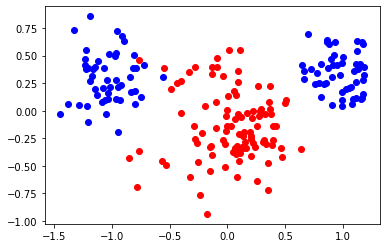

In [57]:
ndata = 100
mA = np.array([1.0, 0.3])
mB = np.array([0.0, -0.1])
sigmaA = 0.2
sigmaB = 0.3
classA = np.zeros([ndata,2])
classB = np.zeros([ndata,2])
classA[:,0] = np.concatenate((np.random.normal(-mA[0], sigmaA,round(0.5*ndata)), np.random.normal(mA[0],sigmaA,round(0.5*ndata))),axis=0);
classA[:,1] = np.random.normal(mA[1], sigmaA, ndata)
classB[:,0] = np.random.normal(mB[0], sigmaB, ndata)
classB[:,1] = np.random.normal(mB[1], sigmaB, ndata)

plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')

In [58]:
data = np.concatenate((classA, classB), axis=0)
labels = np.array([1]*ndata + [-1]*ndata)

data_labels = np.concatenate((data, labels.reshape(ndata*2,1)), axis=1)
np.random.shuffle(data_labels)

X = data_labels[:,:2].T
T = data_labels[:,2].reshape(ndata*2, 1).T

In [63]:
delta_two = Two_Layer_Delta_Rule(X, T, 10)

Obtained error 17.948716414822332


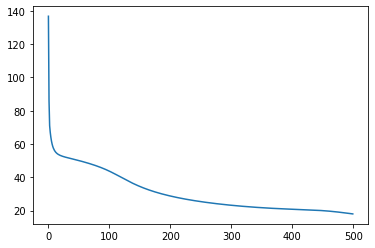

In [73]:
delta_two.epochs = 500
delta_two.eta = 0.01
delta_two.train('seq')
delta_two.plot_errors()

In [74]:
miss_classified = 0
for i in range(delta_two.X.shape[1]):
    x = delta_two.X[:,i]
    t = delta_two.T[:,i]
    y = delta_two.classification_function(x)
    if t != y:
        miss_classified += 1
print(miss_classified)
    

2


Number of missclassified: 2


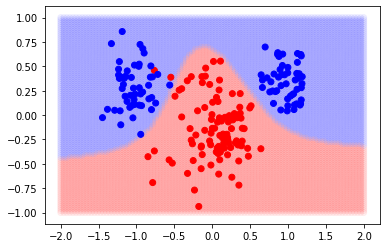

In [75]:
print("Number of missclassified:", miss_classified)
delta_two.plot_decision_boundary()

In [118]:
delta_single = Single_Layer_Delta_Rule(X, T_delta)

Obtained error 17.811178090301624


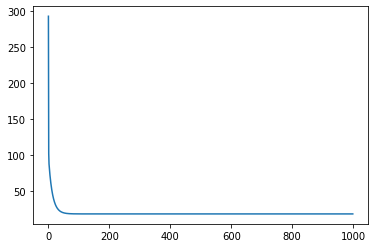

In [119]:
delta_single.epochs = 1000
#delta_single.eta = 0.001
delta_single.train('batch')
delta_single.plot_errors()

In [121]:
miss_classified = 0
for i in range(delta_single.X.shape[1]):
    x = delta_single.X[:,i]
    t = delta_single.T[:,i]
    y = np.sign(np.matmul(delta_single.W_train, x))
    if t != y:
        miss_classified += 1
print(miss_classified)

2


Number of missclassified: 2


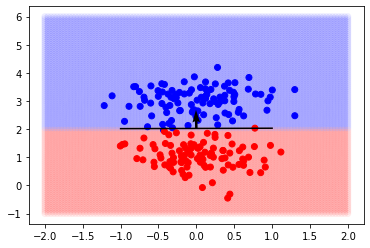

In [122]:
print("Number of missclassified:", miss_classified)
delta_single.plot_decision_boundary()

We can see that the two layer perceptron outperforms the single layer perceptron

## Encoder problem

In [77]:
X_enc = -np.ones([8, 8])
for i in range(X_enc.shape[0]):
    X_enc[i,i] = 1
T_enc = np.copy(X_enc.T)

In [78]:
encoder = Two_Layer_Delta_Rule(X_enc, T_enc, 3)

Obtained error 2.6484746762063374


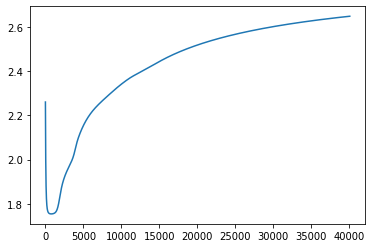

In [53]:
encoder.epochs = 10000
encoder.train('batch')
encoder.plot_errors()

In [62]:
miss_classified = 0
for i in range(encoder.X.shape[1]):
    success = True
    x = encoder.X[:,i]
    t = encoder.T[:,i]
    low_repr = act_funs.shifted_sigmoid(np.matmul(encoder.W1_train, x))
    y = encoder.classification_function(x)
    if not np.array_equal(t, y):
        success = False
        miss_classified += 1
    print("X = {}, Y = {}, Success: {}".format(x,y,success))
    print("Low representation of X:", np.around(low_repr), "\n")
print("Miss classfied:", miss_classified)

X = [ 1. -1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-0. -0. -0.] 

X = [-1.  1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-0. -0. -0.] 

X = [-1. -1.  1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1.  1. -1. -1. -1. -1. -1.], Success: True
Low representation of X: [-1. -0. -1.] 

X = [-1. -1. -1.  1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1.  1. -1. -1. -1. -1.], Success: True
Low representation of X: [-1. -0. -0.] 

X = [-1. -1. -1. -1.  1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-0. -0. -0.] 

X = [-1. -1. -1. -1. -1.  1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1.  1. -1. -1.], Success: True
Low representation of X: [-1. -1.  1.] 

X = [-1. -1. -1. -1. -1. -1.  1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1.  1. -1.], Success: True
Low representation of X: [ 0. -1. -1.] 

X = [-1. -1. -1. -1. -1. -1. -1.  1.  

In [66]:
encoder = Two_Layer_Delta_Rule(X_enc, T_enc, 2)

Obtained error 1.8742000522459064


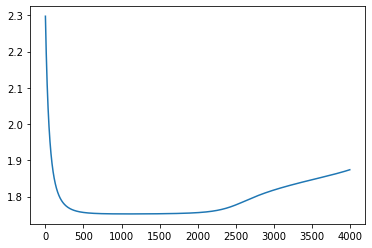

In [69]:
encoder.epochs = 10000
encoder.train('batch')
encoder.plot_errors()

In [70]:
miss_classified = 0
for i in range(encoder.X.shape[1]):
    success = True
    x = encoder.X[:,i]
    t = encoder.T[:,i]
    low_repr = act_funs.shifted_sigmoid(np.matmul(encoder.W1_train, x))
    y = encoder.classification_function(x)
    if not np.array_equal(t, y):
        success = False
        miss_classified += 1
    print("X = {}, Y = {}, Success: {}".format(x,y,success))
    print("Low representation of X:", np.around(low_repr), "\n")
print("Miss classfied:", miss_classified)

X = [ 1. -1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -0.] 

X = [-1.  1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1.  1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1.  1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1. -1.  1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1. -1. -1.  1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1.  1. -1. -1.], Success: True
Low representation of X: [-1.  0.] 

X = [-1. -1. -1. -1. -1. -1.  1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1. -1. -1. -1. -1.  1.  1.], Y = [-1. -1. -1. -1.

## Function approximation

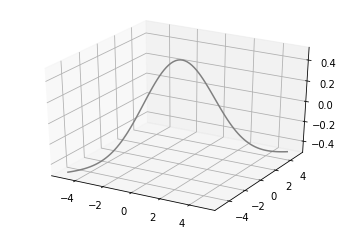

In [3]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_line = np.linspace(-5, 5, 100)
y_line = np.linspace(-5, 5, 100)
z_line = np.exp(-(np.square(x_line) + np.square(x_line))/10) - 0.5
ax.plot3D(x_line, y_line, z_line, 'gray')

plt.show()

In [4]:
targets = np.array(z_line).reshape(len(z_line),1)
x_line = x_line.reshape(len(x_line), 1)
y_line = y_line.reshape(len(y_line), 1)
patterns = np.concatenate((x_line, y_line), axis = 0)

In [37]:
fun_approx = Two_Layer_Delta_Rule(patterns, targets, 10)

Obtained error 0.104378453428392


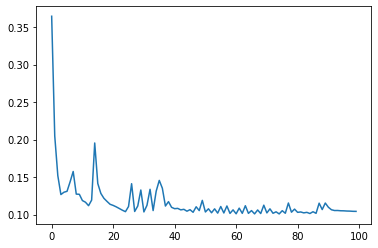

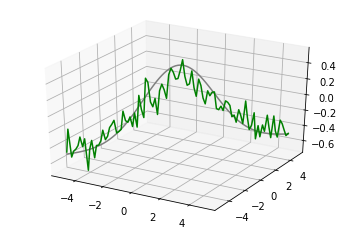

In [38]:
fun_approx.epochs = 100
fun_approx.train()
fun_approx.plot_errors()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_line = np.linspace(-5, 5, 100)
y_line = np.linspace(-5, 5, 100)
z_line = np.exp(-(np.square(x_line) + np.square(x_line))/10) - 0.5
approx = fun_approx.classification_function(fun_approx.X, False)[:,0]
ax.plot3D(x_line, y_line, z_line, 'gray')
ax.plot3D(x_line, y_line, approx, 'green')

In [16]:
from random import randint
train_size = round(targets.shape[1]*0.80)
train_indeces = sorted([randint(0, (targets.shape[1]-1)) for p in range(train_size)])

#train_indeces = list(range(round(2*targets.shape[0]*0.75)))

In [20]:
train_patterns = patterns[train_indeces].reshape(train_size, 1)
train_targets = targets[train_indeces].reshape(train_size, 1)

In [39]:
fun_approx = Two_Layer_Delta_Rule(patterns, targets, 18)

Obtained error 0.12282756676810543


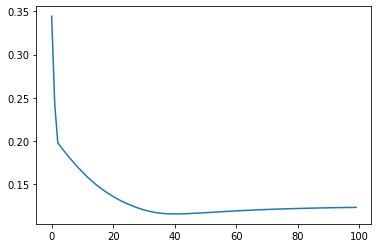

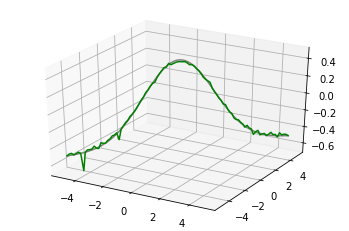

In [40]:
fun_approx.epochs = 100
fun_approx.train()
fun_approx.plot_errors()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_line = np.linspace(-5, 5, 100)
y_line = np.linspace(-5, 5, 100)
z_line = np.exp(-(np.square(x_line) + np.square(x_line))/10) - 0.5

approx = fun_approx.classification_function(fun_approx.X, False)[:,0]
#x_line_train = np.linspace(-5, 5, 100)[train_indeces]
#y_line_train = np.linspace(-5, 5, 100)[train_indeces]

ax.plot3D(x_line, y_line, z_line, 'gray')
ax.plot3D(x_line, y_line, approx, 'green')

In [ ]:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25